In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

61.62900302293548 80.34522116942173
-9.93299120076425 -63.84684220311502
66.3309477484284 141.35993414547642
-82.20022181190856 36.68770101775695
14.869307241048404 93.54315990807032
-35.527490233235895 -137.76193711012127
-38.64939415165222 -146.51941297343816
-45.57590881823801 86.48834929096671
-64.00275380993111 158.79615111865735
-38.80420855966529 157.64829701958251
-1.3678398851756555 -113.70098889185203
-86.49568870869933 -51.90325180050945
20.632586590015094 104.73446916008248
7.526734953261098 41.09901546138411
-21.869310297811566 -20.47531646763582
17.748083967997445 90.44105090594599
-74.95921150903526 -32.61163312045389
60.49728299661649 -68.22951996528917
38.70532302091206 -41.92904783702065
1.5853313424682938 -49.56391113729498
23.370664155609347 -80.96221917549306
-24.645964347223938 74.48635952679123
-70.17109513659939 -113.85807948540464
79.94212770178197 38.36412991157306
-32.578763544144444 -175.03719379610854
49.041269264562885 28.043477520876422
-2.137798334127211

In [14]:
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

650

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1943624cffafddb61326913a0a7412c


In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kargasok
Processing Record 2 of Set 1 | ariquemes
Processing Record 3 of Set 1 | khonuu
City not found. Skipping...
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | labutta
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | kiama
Processing Record 11 of Set 1 | coahuayana
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hoa binh
Processing Record 14 of Set 1 | ginir
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | akyab
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | amapa
Processing Record 20 of Set 1 | varadero
Processing Record 21 of Set 1 | grand river south east
City not found. Skippi

Processing Record 36 of Set 4 | lolua
City not found. Skipping...
Processing Record 37 of Set 4 | ancud
Processing Record 38 of Set 4 | kholmogory
Processing Record 39 of Set 4 | lorengau
Processing Record 40 of Set 4 | mayor pablo lagerenza
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | prieska
Processing Record 43 of Set 4 | vao
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | talara
Processing Record 46 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 4 | neryungri
Processing Record 48 of Set 4 | pontes e lacerda
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | puerto ayora
Processing Record 1 of Set 5 | camocim
Processing Record 2 of Set 5 | jaisalmer
Processing Record 3 of Set 5 | villazon
Processing Record 4 of Set 5 | sol-iletsk
Processing Record 5 of Set 5 | bari
Processing Record 6 of Set 5 | haines junction
Processing Record 7 of Set 5 | louisbourg
City not found. Skipping...
Pr

Processing Record 24 of Set 8 | kununurra
Processing Record 25 of Set 8 | irtyshskiy
Processing Record 26 of Set 8 | pitimbu
Processing Record 27 of Set 8 | gavle
Processing Record 28 of Set 8 | orlovskiy
Processing Record 29 of Set 8 | san jose
Processing Record 30 of Set 8 | punto fijo
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | talcahuano
Processing Record 34 of Set 8 | salinas
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | broken hill
Processing Record 37 of Set 8 | balacita
Processing Record 38 of Set 8 | bergama
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | pokhara
Processing Record 41 of Set 8 | carutapera
Processing Record 42 of Set 8 | leiyang
Processing Record 43 of Set 8 | antofagasta
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | syracuse
Processing Record 46 of Set 8 | dikson
Processing Record 47 of Set 8 | kuche
City not f

Processing Record 12 of Set 12 | jalu
Processing Record 13 of Set 12 | anuradhapura
Processing Record 14 of Set 12 | lakes entrance
Processing Record 15 of Set 12 | karaul
City not found. Skipping...
Processing Record 16 of Set 12 | lethem
Processing Record 17 of Set 12 | ishinomaki
Processing Record 18 of Set 12 | dengfeng
Processing Record 19 of Set 12 | bhilai
Processing Record 20 of Set 12 | nelson bay
Processing Record 21 of Set 12 | amuntai
Processing Record 22 of Set 12 | usinsk
Processing Record 23 of Set 12 | naze
Processing Record 24 of Set 12 | sinazongwe
Processing Record 25 of Set 12 | dodola
Processing Record 26 of Set 12 | batsfjord
Processing Record 27 of Set 12 | port-gentil
Processing Record 28 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 12 | phan rang
City not found. Skipping...
Processing Record 30 of Set 12 | maceio
Processing Record 31 of Set 12 | turiacu
Processing Record 32 of Set 12 | barguzin
Processing Record 33 of Set 12

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kargasok,59.0556,80.8572,49.69,97,100,9.66,RU,2022-06-30 20:19:42
1,Ariquemes,-9.9133,-63.0408,90.28,32,0,1.81,BR,2022-06-30 20:19:42
2,Port Elizabeth,-33.9180,25.5701,58.32,57,0,1.99,ZA,2022-06-30 20:13:47
3,Rikitea,-23.1203,-134.9692,68.22,89,100,9.44,PF,2022-06-30 20:13:47
4,Mataura,-46.1927,168.8643,40.48,88,98,8.75,NZ,2022-06-30 20:15:16
5,Busselton,-33.6500,115.3333,47.98,86,0,5.59,AU,2022-06-30 20:13:51
6,Bluff,-46.6000,168.3333,40.80,70,100,27.60,NZ,2022-06-30 20:15:20
7,Kiama,-34.6833,150.8667,53.38,87,100,1.99,AU,2022-06-30 20:19:44
8,Coahuayana,18.7333,-103.6833,91.11,52,99,7.67,MX,2022-06-30 20:11:09
9,Ushuaia,-54.8000,-68.3000,33.42,74,0,5.75,AR,2022-06-30 20:10:05


In [31]:
#Setup new new_column_order=[“column1”, “column8”, “column9”, “column2”, “column3”, “column4”, “column5”, “column6”, “column7”] 

new_column_order=["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kargasok,RU,2022-06-30 20:19:42,59.0556,80.8572,49.69,97,100,9.66
1,Ariquemes,BR,2022-06-30 20:19:42,-9.9133,-63.0408,90.28,32,0,1.81
2,Port Elizabeth,ZA,2022-06-30 20:13:47,-33.9180,25.5701,58.32,57,0,1.99
3,Rikitea,PF,2022-06-30 20:13:47,-23.1203,-134.9692,68.22,89,100,9.44
4,Mataura,NZ,2022-06-30 20:15:16,-46.1927,168.8643,40.48,88,98,8.75
5,Busselton,AU,2022-06-30 20:13:51,-33.6500,115.3333,47.98,86,0,5.59
6,Bluff,NZ,2022-06-30 20:15:20,-46.6000,168.3333,40.80,70,100,27.60
7,Kiama,AU,2022-06-30 20:19:44,-34.6833,150.8667,53.38,87,100,1.99
8,Coahuayana,MX,2022-06-30 20:11:09,18.7333,-103.6833,91.11,52,99,7.67
9,Ushuaia,AR,2022-06-30 20:10:05,-54.8000,-68.3000,33.42,74,0,5.75


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

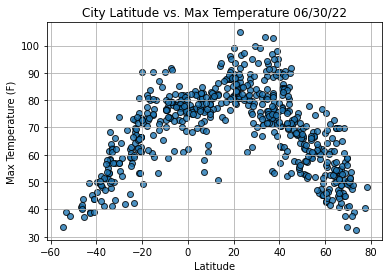

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

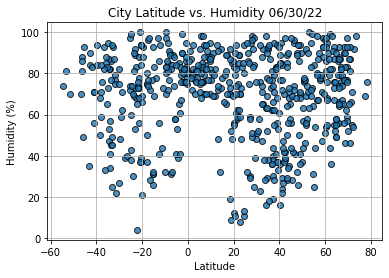

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

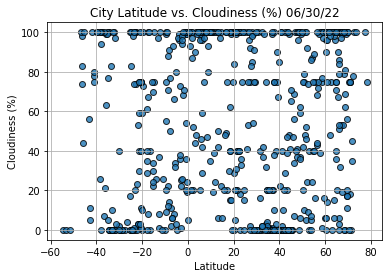

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()